<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/supplementary_tables/SupplementaryTable4/CIP_all_DEGs_annotated_by_timepoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SupplementaryTable4 DEGs annotated by timepoint
#Acinar (by timepoint), Fibroblast (by celltype), Ductal (0hr), Endothelial (0hr)

#Loading Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install scanpy leidenalg watermark pandas==1.5.3 rpy2==3.4.5 umap-learn==0.5.3 plotnine==0.8.0 anndata panel anndata2ri

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import scipy.sparse as sp
from scipy.sparse import issparse
import anndata2ri

import matplotlib as mpl
from scipy import stats as scistats
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
from pathlib import Path
from ipywidgets import interactive

sc._settings.ScanpyConfig.n_jobs=8

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
sc.set_figure_params(color_map='viridis')
colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


%matplotlib inline
import panel as pn
pn.extension( comms='colab')


#Setup WD

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/CIP_all/DEGs/'

samplename='CIP_all_v3_'
random_state=42

import os
os.chdir(folder)


In [ ]:
adata=sc.read('/content/drive/MyDrive/CIP_v3_data/CIP_all/FullDataset/datasets/CIP_all_v3_no_W6_8__filteredNormalized_annotated_2023-02-14.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 68378 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'annotated_ADM2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable'
    u

In [ ]:
adata.obs['annotated'].value_counts()

Macrophage / DC    24434
Fibroblast         17654
Acinar             15730
Endothelial         3171
Ductal              2585
Neutrophil          1420
T / NK              1127
B-cell               929
Pericyte             586
Endocrine            320
Mesothelial          181
Plasmacytoid DC      163
Schwann               78
Name: annotated, dtype: int64

#Acinar by timepoint

In [ ]:
acinar= adata[adata.obs['annotated'].isin(['Acinar'])]
acinar

View of AnnData object with n_obs × n_vars = 15730 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'annotated_ADM2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variabl

##Renormalize subset


In [ ]:
acinar.layers["counts"] = acinar.layers['cellbender']
acinar.X=acinar.layers["counts"]
acinar.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(acinar,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(acinar, target_sum=None, inplace=False)
# log1p transform
acinar.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
acinar.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(acinar, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]


## Rank Marker genes

In [ ]:
#method : {‘logreg’, ‘t-test’, ‘wilcoxon’, ‘t-test_overestim_var’} | None (default: None)
sc.tl.rank_genes_groups(acinar, "sample", method='wilcoxon',n_genes=acinar.shape[1],layer='PFlog1pPF_normalization', rankby_abs=False,corr_method='bonferroni',key_added='wilcoxon_rank_genes_groups' )
wilcoxon=pd.DataFrame(acinar.uns['wilcoxon_rank_genes_groups']['names']).head(100)
wilcoxon

,Control,0hr,14hr,24hr,72hr,5day,14day
0,Sycn,Actg1,Gm2663,Cmss1,Prss1,Prss1,Cela2a
1,Tff2,Krt8,Krt18,Gm2663,Gm5771,Gm5771,Try4
2,Rnase1,Actb,Krt8,Reg3b,Reg3b,Prss3,Prss2
3,Gp2,Krt18,Cmss1,Camk1d,Gm2663,Gm10334,Cela1
4,Pnlip,Dstn,Tmsb10,Reg3g,1810009J06Rik,1810009J06Rik,Ctrl
...,...,...,...,...,...,...,...
95,Rps15,Ifitm3,Dbi,Eif3f,Birc5,Atp1a1,Ggt1
96,Magt1,Esd,Pfn1,Snrpg,Cckar,Ppib,Eif3k
97,mt-Co3,Eif6,Tubb5,Dynll1,Snrpg,Cited2,Rpl21
98,Ppib,Prdx1,Efhd2,Arpc2,Hmgn1,Pycard,Ppib


In [ ]:
savetable=samplename+ "_acinar_wilcoxon_marker_genes_2023-05-23.csv"
wilcoxon.to_csv(savetable)

##DEG table

In [ ]:
#Function without pct1 and pct2

def make_deg_table(adata_degs, filename):
    cell_types = adata_degs['names'].dtype.names

    data = []
    for cell_type in cell_types:
        genes = pd.DataFrame(adata_degs['names'])[cell_type].head(100)
        log_fold_change = pd.DataFrame(adata_degs['logfoldchanges'])[cell_type].head(100)
        adjusted_pval = pd.DataFrame(adata_degs['pvals_adj'])[cell_type].head(100)
        score = pd.DataFrame(adata_degs['scores'])[cell_type].head(100)

        for i in range(100):
            data.append([cell_type, genes[i], log_fold_change[i], adjusted_pval[i], score[i]])

    df = pd.DataFrame(data, columns=["Cell type", "Gene", "Log fold change", "Adjusted p-val", 'Score'])
    df.to_csv(filename, index=False)


In [ ]:
make_deg_table(acinar.uns['wilcoxon_rank_genes_groups'], filename= 'acinar_deg_table_test.csv')

#Fibroblasts by timepoint

In [ ]:
adata2= adata[adata.obs['annotated'].isin(['Fibroblast'])]
adata2

View of AnnData object with n_obs × n_vars = 17654 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'annotated_ADM2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variabl

##Renormalize subset


In [ ]:
adata2.layers["counts"] = adata2.layers['cellbender']
adata2.X=adata2.layers["counts"]
adata2.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(adata2,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(adata2, target_sum=None, inplace=False)
# log1p transform
adata2.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
adata2.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(adata2, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]


## Rank Marker genes

In [ ]:
#method : {‘logreg’, ‘t-test’, ‘wilcoxon’, ‘t-test_overestim_var’} | None (default: None)
sc.tl.rank_genes_groups(adata2, "sample", method='wilcoxon',n_genes=adata2.shape[1],layer='PFlog1pPF_normalization', rankby_abs=False,corr_method='bonferroni',key_added='wilcoxon_rank_genes_groups' )
wilcoxon=pd.DataFrame(adata2.uns['wilcoxon_rank_genes_groups']['names']).head(100)
wilcoxon

,Control,0hr,14hr,24hr,72hr,5day,14day
0,Gsn,Mt2,Timp1,Cmss1,Mmp2,Apoe,Ctrb1
1,mt-Atp6,Timp1,Serp1,Cthrc1,Mmp14,Gm42418,Fth1
2,Gstm1,Hspd1,Fkbp11,Hexb,Nupr1,Mgp,Gsn
3,Clec3b,Ran,Sec11c,Ssr4,Mfap4,Ifi27l2a,Tpt1
4,Rarres2,Nop56,Sec61b,Postn,Sox4,B2m,Dcn
...,...,...,...,...,...,...,...
95,Rpl21,Nxn,Ufsp2,Cd55,Map4k4,Klf6,Myl6
96,Lama4,Lmnb1,Ndufa4,Eln,Gxylt2,Ptn,Fos
97,Actg1,Gpatch4,Edem1,Lbh,Foxo3,Dbp,Anxa5
98,Sept7,Yrdc,Lox,Snx6,Zfp704,Nav1,Ppia


In [ ]:
savetable=samplename+ "_fibro_wilcoxon_marker_genes_2023-05-23.csv"
wilcoxon.to_csv(savetable)

##DEG table

In [ ]:
#Function without pct1 and pct2

def make_deg_table(adata_degs, filename):
    cell_types = adata_degs['names'].dtype.names

    data = []
    for cell_type in cell_types:
        genes = pd.DataFrame(adata_degs['names'])[cell_type].head(100)
        log_fold_change = pd.DataFrame(adata_degs['logfoldchanges'])[cell_type].head(100)
        adjusted_pval = pd.DataFrame(adata_degs['pvals_adj'])[cell_type].head(100)
        score = pd.DataFrame(adata_degs['scores'])[cell_type].head(100)

        for i in range(100):
            data.append([cell_type, genes[i], log_fold_change[i], adjusted_pval[i], score[i]])

    df = pd.DataFrame(data, columns=["Cell type", "Gene", "Log fold change", "Adjusted p-val", 'Score'])
    df.to_csv(filename, index=False)


In [ ]:
def make_deg_table2(adata_degs, filename):
    cell_types = adata_degs['names'].dtype.names

    data = []
    for cell_type in cell_types:
        # Create DataFrame for each cell type
        df = pd.DataFrame({
            'Gene': adata_degs['names'][cell_type],
            'Log fold change': adata_degs['logfoldchanges'][cell_type],
            'Adjusted p-val': adata_degs['pvals_adj'][cell_type],
            'Score': adata_degs['scores'][cell_type]
        })

        # Select rows with "Log fold change" > 2
        df_selected = df[df['Log fold change'] > 2]

        # Append selected rows to data
        for _, row in df_selected.iterrows():
            data.append([cell_type, row['Gene'], row['Log fold change'], row['Adjusted p-val'], row['Score']])

    df = pd.DataFrame(data, columns=["Cell type", "Gene", "Log fold change", "Adjusted p-val", 'Score'])
    df.to_csv(filename, index=False)


In [ ]:
make_deg_table(adata2.uns['wilcoxon_rank_genes_groups'], filename= 'fibro_deg_table_test.csv')

In [ ]:
make_deg_table2(adata2.uns['wilcoxon_rank_genes_groups'], filename= 'fibro_deg_table_logFC2.csv')

#Fibroblasts by celltype

In [ ]:
adata2= adata[adata.obs['annotated'].isin(['Fibroblast'])]
adata2

View of AnnData object with n_obs × n_vars = 17654 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'annotated_ADM2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variabl

##Renormalize subset


In [ ]:
adata2.layers["counts"] = adata2.layers['cellbender']
adata2.X=adata2.layers["counts"]
adata2.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(adata2,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(adata2, target_sum=None, inplace=False)
# log1p transform
adata2.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
adata2.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(adata2, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]


#Sample colors

In [ ]:
sc.tl.leiden(adata2,random_state=random_state, resolution=0.2, key_added='leiden_r0.2')
sc.tl.leiden(adata2,random_state=random_state, resolution=0.3, key_added='leiden_r0.3')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


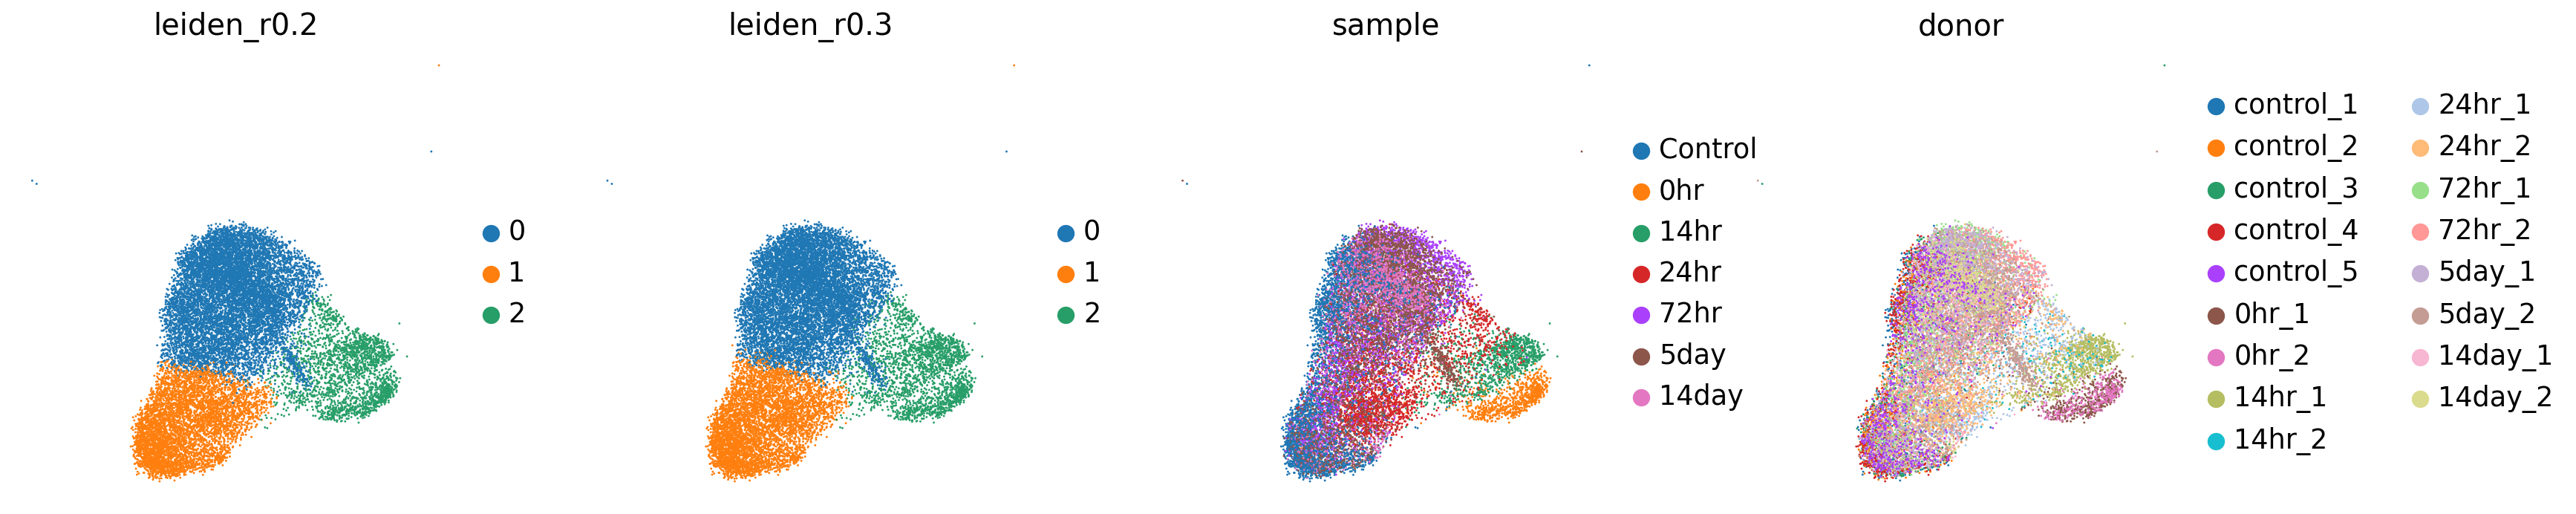

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(5,5)
sc.pl.umap(adata2, color=['leiden_r0.2','leiden_r0.3','sample','donor'], legend_loc='right margin',legend_fontoutline=3, legend_fontweight='normal',frameon=False)

In [ ]:
adata2.obs['leiden_r0.3'] = adata2.obs['leiden_r0.3'].cat.add_categories(['Pi16+','Col15a1+','Activated'])

adata2.obs['leiden_r0.3'][np.in1d(adata2.obs['leiden_r0.3'],  ['2'])] = 'Activated'
adata2.obs['leiden_r0.3'][np.in1d(adata2.obs['leiden_r0.3'],  ['0'])] = 'Col15a1+'
adata2.obs['leiden_r0.3'][np.in1d(adata2.obs['leiden_r0.3'],  ['1'])] = 'Pi16+'

adata2.obs['leiden_r0.3'] = adata2.obs['leiden_r0.3'].cat.remove_unused_categories()

## Rank Marker genes

In [ ]:
cluster_by="leiden_r0.3"

In [ ]:
#method : {‘logreg’, ‘t-test’, ‘wilcoxon’, ‘t-test_overestim_var’} | None (default: None)
sc.tl.rank_genes_groups(adata2, cluster_by, method='wilcoxon',n_genes=adata2.shape[1],layer='PFlog1pPF_normalization', rankby_abs=False,corr_method='bonferroni',key_added='wilcoxon_rank_genes_groups' )
wilcoxon=pd.DataFrame(adata2.uns['wilcoxon_rank_genes_groups']['names']).head(100)
wilcoxon

,Pi16+,Col15a1+,Activated
0,Fn1,Sparcl1,Timp1
1,Anxa3,Mgp,Fkbp11
2,Sema3c,Igfbp7,Serp1
3,Fbn1,Abca8a,Acta2
4,Efemp1,Col15a1,Sec11c
...,...,...,...
95,Tspan5,Entpd2,Nasp
96,Fhl1,Adap2,Tomm40
97,Jpt1,Lamp2,Mrpl18
98,Smurf2,Nrp1,Dnajb11


In [ ]:
savetable=samplename+ "_fibro_byCellType_wilcoxon_marker_genes_2023-06-02.csv"
wilcoxon.to_csv(savetable)

##DEG table

In [ ]:
#Function without pct1 and pct2

def make_deg_table(adata_degs, filename):
    cell_types = adata_degs['names'].dtype.names

    data = []
    for cell_type in cell_types:
        genes = pd.DataFrame(adata_degs['names'])[cell_type].head(100)
        log_fold_change = pd.DataFrame(adata_degs['logfoldchanges'])[cell_type].head(100)
        adjusted_pval = pd.DataFrame(adata_degs['pvals_adj'])[cell_type].head(100)
        score = pd.DataFrame(adata_degs['scores'])[cell_type].head(100)

        for i in range(100):
            data.append([cell_type, genes[i], log_fold_change[i], adjusted_pval[i], score[i]])

    df = pd.DataFrame(data, columns=["Cell type", "Gene", "Log fold change", "Adjusted p-val", 'Score'])
    df.to_csv(filename, index=False)


In [ ]:
make_deg_table(adata2.uns['wilcoxon_rank_genes_groups'], filename= 'fibro_byCellType_deg_table_2023-06-02.csv')

#Ductal by timepoint

In [ ]:
adata2= adata[adata.obs['annotated'].isin(['Ductal'])]
adata2

View of AnnData object with n_obs × n_vars = 2585 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'annotated_ADM2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable

##Renormalize subset


In [ ]:
adata2.layers["counts"] = adata2.layers['cellbender']
adata2.X=adata2.layers["counts"]
adata2.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(adata2,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(adata2, target_sum=None, inplace=False)
# log1p transform
adata2.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
adata2.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(adata2, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]


## Rank Marker genes

In [ ]:
# Subset the data to only include '0hr' and 'Control' samples
adata_subset = adata2[adata2.obs['sample'].isin(['0hr', 'Control'])]

# Perform differential expression analysis
sc.tl.rank_genes_groups(
    adata_subset,
    "sample",
    groups=['0hr'],
    reference='Control',
    method='wilcoxon',
    n_genes=adata_subset.shape[1],
    layer='PFlog1pPF_normalization',
    rankby_abs=False,
    corr_method='bonferroni',
    key_added='wilcoxon_rank_genes_groups'
)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


##DEG table

In [ ]:
#Function without pct1 and pct2

def make_deg_table(adata_degs, filename):
    cell_types = adata_degs['names'].dtype.names

    data = []
    for cell_type in cell_types:
        genes = pd.DataFrame(adata_degs['names'])[cell_type].head(100)
        log_fold_change = pd.DataFrame(adata_degs['logfoldchanges'])[cell_type].head(100)
        adjusted_pval = pd.DataFrame(adata_degs['pvals_adj'])[cell_type].head(100)
        score = pd.DataFrame(adata_degs['scores'])[cell_type].head(100)

        for i in range(100):
            data.append([cell_type, genes[i], log_fold_change[i], adjusted_pval[i], score[i]])

    df = pd.DataFrame(data, columns=["Cell type", "Gene", "Log fold change", "Adjusted p-val", 'Score'])
    df.to_csv(filename, index=False)


In [ ]:
make_deg_table(adata_subset.uns['wilcoxon_rank_genes_groups'], filename= 'ductal_up0hr_table_test.csv')

#Endothelial by timepoint

In [ ]:
adata2= adata[adata.obs['annotated'].isin(['Endothelial'])]
adata2

View of AnnData object with n_obs × n_vars = 3171 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'annotated_ADM2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable

##Renormalize subset


In [ ]:
adata2.layers["counts"] = adata2.layers['cellbender']
adata2.X=adata2.layers["counts"]
adata2.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(adata2,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(adata2, target_sum=None, inplace=False)
# log1p transform
adata2.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
adata2.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(adata2, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]


## Rank Marker genes

In [ ]:
# Subset the data to only include '0hr' and 'Control' samples
adata_subset = adata2[adata2.obs['sample'].isin(['0hr', 'Control'])]

# Perform differential expression analysis
sc.tl.rank_genes_groups(
    adata_subset,
    "sample",
    groups=['0hr'],
    reference='Control',
    method='wilcoxon',
    n_genes=adata_subset.shape[1],
    layer='PFlog1pPF_normalization',
    rankby_abs=False,
    corr_method='bonferroni',
    key_added='wilcoxon_rank_genes_groups'
)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [ ]:
savetable=samplename+ "_endothelial_wilcoxon_marker_genes_2023-05-23.csv"
wilcoxon.to_csv(savetable)

##DEG table

In [ ]:
#Function without pct1 and pct2

def make_deg_table(adata_degs, filename):
    cell_types = adata_degs['names'].dtype.names

    data = []
    for cell_type in cell_types:
        genes = pd.DataFrame(adata_degs['names'])[cell_type].head(100)
        log_fold_change = pd.DataFrame(adata_degs['logfoldchanges'])[cell_type].head(100)
        adjusted_pval = pd.DataFrame(adata_degs['pvals_adj'])[cell_type].head(100)
        score = pd.DataFrame(adata_degs['scores'])[cell_type].head(100)

        for i in range(100):
            data.append([cell_type, genes[i], log_fold_change[i], adjusted_pval[i], score[i]])

    df = pd.DataFrame(data, columns=["Cell type", "Gene", "Log fold change", "Adjusted p-val", 'Score'])
    df.to_csv(filename, index=False)


In [ ]:
make_deg_table(adata_subset.uns['wilcoxon_rank_genes_groups'], filename= 'endothelial_0hr_deg_table_test.csv')